<a href="https://colab.research.google.com/github/SulemanShahani/Machine-Failure-Prediction-Model/blob/main/machine_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv(r"/content/ai4i2020.csv")
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
df['Machine failure'].unique()

array([0, 1], dtype=int64)

In [ ]:
df['TWF'].unique()

array([0, 1], dtype=int64)

In [ ]:
df['HDF'].unique()

array([0, 1], dtype=int64)

In [ ]:
df['PWF'].unique()

array([0, 1], dtype=int64)

In [ ]:
df['OSF'].unique()

array([0, 1], dtype=int64)

In [ ]:
df['RNF'].unique()

array([0, 1], dtype=int64)

In [ ]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [ ]:
df['Product ID'].unique()

array(['M14860', 'L47181', 'L47182', ..., 'M24857', 'H39412', 'M24859'],
      dtype=object)

In [3]:
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
X = df[features]
y = df['Machine failure']

In [4]:
classes = [ 'Machine OK', 'Failed']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, splitter='best' ,random_state=0)
z=dt.fit(X, y);

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay

In [ ]:
cross_val_score(dt,X,y,cv=200,scoring='accuracy').mean()

0.9736000000000001

C:\Users\SULEMAN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


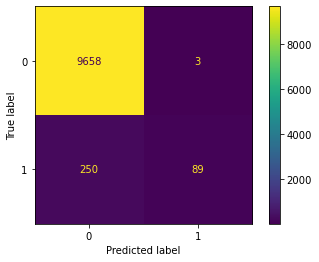

In [ ]:
plot_confusion_matrix(dt,X,y)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text  # both are new in 0.21

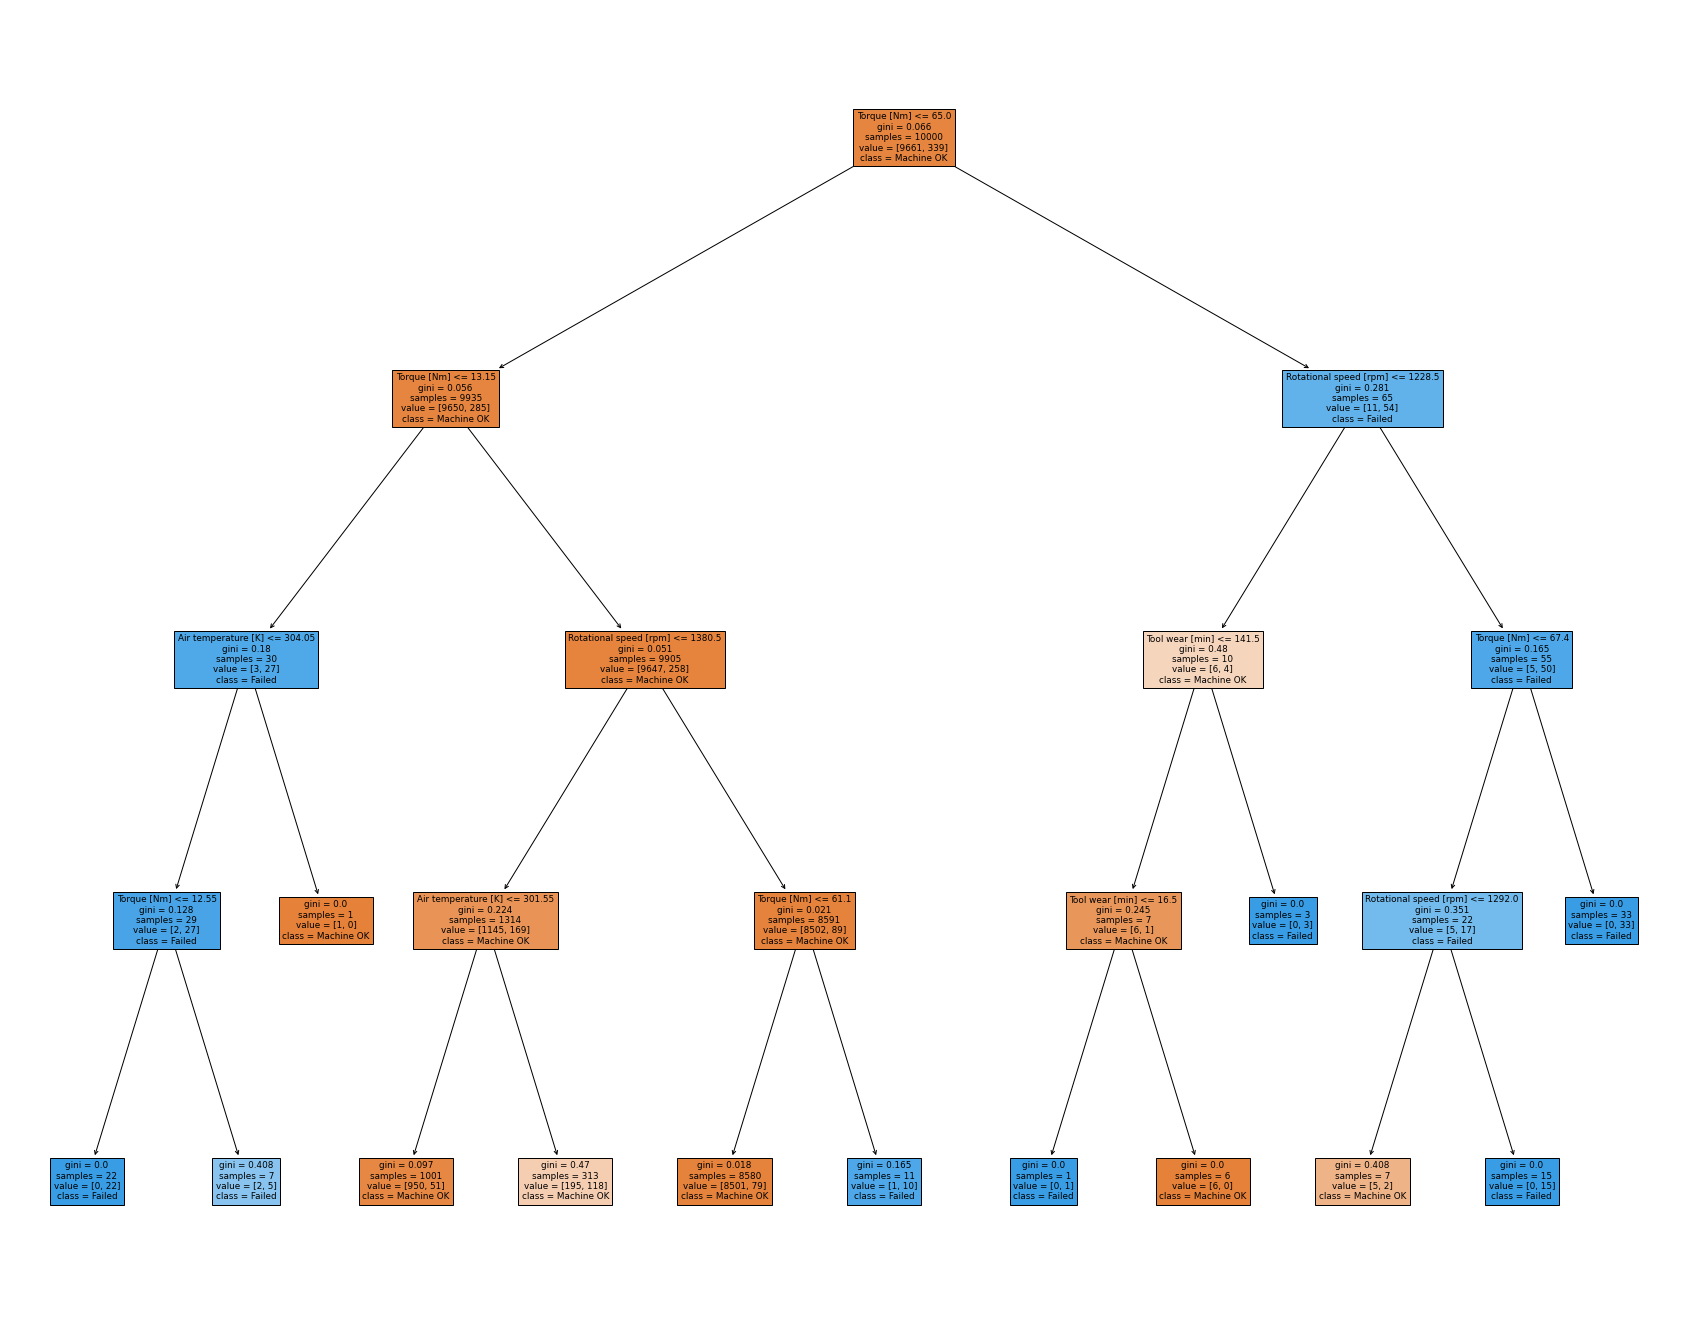

In [ ]:
plt.figure(figsize=(30, 24))
plot_tree(dt, feature_names=features, class_names=classes, filled=True);

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9725


In [6]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are your true and predicted labels, respectively
print(classification_report(y_test, y_pred, target_names=classes))


              precision    recall  f1-score   support

  Machine OK       0.98      0.99      0.99      1939
      Failed       0.62      0.26      0.37        61

    accuracy                           0.97      2000
   macro avg       0.80      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000



In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9835


In [10]:
importances = model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)


                         importance
Torque [Nm]                0.320955
Rotational speed [rpm]     0.214712
Air temperature [K]        0.161565
Tool wear [min]            0.153936
Process temperature [K]    0.148831


In [11]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")


Cross-validation scores: [0.976  0.974  0.5645 0.973  0.981 ]
Mean accuracy: 0.8936999999999999


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")


Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


Model Interpretability:

Depending on the model chosen, interpretability might be important. Consider using techniques like feature importance or SHAP values to understand how different features contribute to predictions.
Example of SHAP values with a tree-based model:

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.5 MB/s eta 0:00:00


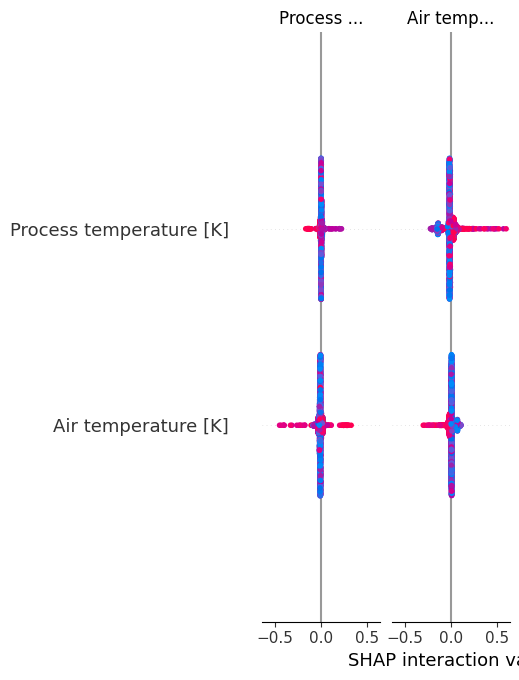

In [14]:
!pip install shap
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar')
